In [146]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


In [147]:
# img_test = cv.imread('datasets/normal/nodefect(1).bmp')
img_test = cv.imread('datasets/unnormal/defection(3).bmp')
# plt.imshow(img_test)


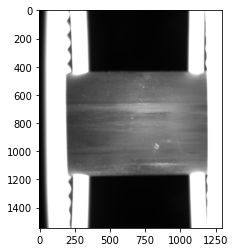

In [148]:
img_test_gray = cv.imread('datasets/unnormal/defection(1).bmp', cv.IMREAD_GRAYSCALE)
# img_test_gray = cv.imread('datasets/normal/nodefect(1).bmp', cv.IMREAD_GRAYSCALE)
plt.imshow(img_test_gray, cmap='gray')


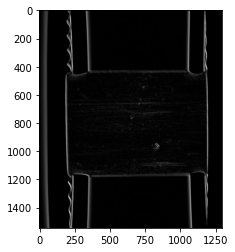

In [149]:
img_gray_blur = cv.GaussianBlur(img_test_gray, (9,9), 0)

grad_x = cv.Sobel(img_gray_blur, ddepth=cv.CV_32F, dx=1, dy=0)
grad_y = cv.Sobel(img_gray_blur, ddepth=cv.CV_32F, dx=0, dy=1)

img_gray_blur_gradient = cv.subtract(grad_x, grad_y)
img_gray_blur_gradient = cv.convertScaleAbs(img_gray_blur_gradient)

plt.imshow(img_gray_blur_gradient, cmap='gray')


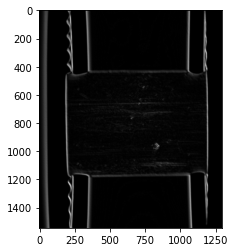

In [150]:
test_blurred = cv.GaussianBlur(img_gray_blur_gradient, (9, 9), 0)
_, test_thresh = cv.threshold(test_blurred, 220, 255, cv.THRESH_TOZERO_INV)
plt.imshow(test_thresh, cmap='gray')


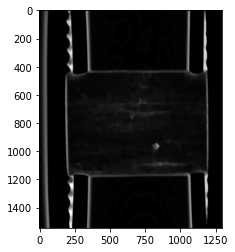

In [158]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (25, 25))
closed = cv.morphologyEx(test_thresh, cv.MORPH_CLOSE, kernel)

closed = cv.erode(closed, None, iterations=4)
closed = cv.dilate(closed, None, iterations=4)

plt.imshow(closed, cmap='gray')


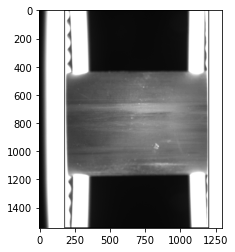

In [166]:
cnts, _ = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

c = sorted(cnts, key=cv.contourArea, reverse=True)[0]
rect = cv.minAreaRect(c)
box = np.int0(cv.boxPoints(rect))

draw_img = cv.drawContours(img_test_gray.copy(), [box], -1, (0, 0, 255), 3)
plt.imshow(draw_img, cmap='gray')


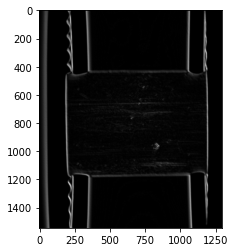

In [151]:
_, img_gray_binary = cv.threshold(test_thresh, 220, 250, cv.THRESH_TOZERO_INV)
plt.imshow(img_gray_binary, cmap='gray')


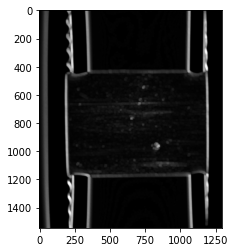

In [152]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))
img_gray_binary_erode_dilate = cv.dilate(img_gray_binary, kernel)
plt.imshow(img_gray_binary_erode_dilate, cmap='gray')


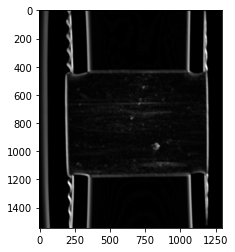

In [153]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
# kernel = np.ones((5, 5), np.uint8)
img_gray_binary_erode_dilate = cv.erode(img_gray_binary_erode_dilate, kernel,20)
plt.imshow(img_gray_binary_erode_dilate, cmap='gray')


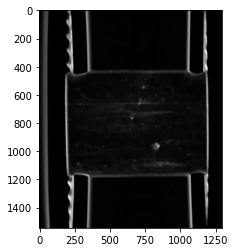

In [154]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (25, 25))
closed = cv.morphologyEx(img_gray_binary_erode_dilate, cv.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap='gray')


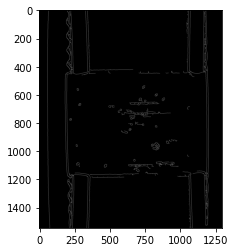

In [155]:
img_gray_blur_binary_erode_canny = cv.Canny(img_gray_binary_erode_dilate, 0, 50, apertureSize=3 )
plt.imshow(img_gray_blur_binary_erode_canny, cmap='gray')


In [156]:
(contours, _) = cv.findContours(img_gray_blur_binary_erode_canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# print the number of contours
print('the count of contours is %d \n' % (len(contours)))


the count of contours is 323 



In [157]:
# c = sorted(contours, key=cv.contourArea, reverse=True)[0]
#
# rect = cv.minAreaRect(c)
# box = np.int0(cv.boxPoints(rect))
#
# img_copy = img_test_gray.copy()
# draw_img = cv.drawContours(img_copy, [box], -1, (0, 0, 255), 3)
#
# # cv.drawContours(img_copy, contours, -1, (120, 120, 120), 40)
# plt.imshow(img_copy, cmap='gray')